In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [154]:
df= pd.read_csv('ALF_Data.csv')
pd.set_option('display.max_columns', None)
df.head()

,Age,Gender,Region,Weight,Height,BodyMassIndex,Obesity,Waist,MaximumBloodPressure,MinimumBloodPressure,GoodCholesterol,BadCholesterol,TotalCholesterol,Dyslipidemia,PVD,PhysicalActivity,Education,Unmarried,Income,Source of Care,PoorVision,AlcoholConsumption,HyperTension,FamilyHyperTension,Diabetes,FamilyDiabetes,Hepatitis,FamilyHepatitis,ChronicFatigue,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,297.0,0,0,3.0,0.0,0.0,1.0,Governament Hospital,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,166.0,0,0,3.0,0.0,NaN,1.0,Never Counsulted,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,255.0,1,0,1.0,0.0,1.0,0.0,Never Counsulted,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,230.0,0,0,2.0,1.0,0.0,0.0,Private Hospital,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,221.0,0,0,1.0,0.0,0.0,NaN,clinic,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [155]:
df.shape

(8785, 30)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 30 columns):
Age                     8785 non-null int64
Gender                  8785 non-null object
Region                  8785 non-null object
Weight                  8591 non-null float64
Height                  8594 non-null float64
BodyMassIndex           8495 non-null float64
Obesity                 8495 non-null float64
Waist                   8471 non-null float64
MaximumBloodPressure    8481 non-null float64
MinimumBloodPressure    8409 non-null float64
GoodCholesterol         8768 non-null float64
BadCholesterol          8767 non-null float64
TotalCholesterol        8769 non-null float64
Dyslipidemia            8785 non-null int64
PVD                     8785 non-null int64
PhysicalActivity        8775 non-null float64
Education               8765 non-null float64
Unmarried               8333 non-null float64
Income                  7624 non-null float64
Source of Care          878

In [158]:
df = df.dropna(axis=0, subset=['ALF'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 30 columns):
Age                     6000 non-null int64
Gender                  6000 non-null object
Region                  6000 non-null object
Weight                  5867 non-null float64
Height                  5861 non-null float64
BodyMassIndex           5794 non-null float64
Obesity                 5794 non-null float64
Waist                   5785 non-null float64
MaximumBloodPressure    5794 non-null float64
MinimumBloodPressure    5748 non-null float64
GoodCholesterol         5992 non-null float64
BadCholesterol          5992 non-null float64
TotalCholesterol        5994 non-null float64
Dyslipidemia            6000 non-null int64
PVD                     6000 non-null int64
PhysicalActivity        5992 non-null float64
Education               5985 non-null float64
Unmarried               5699 non-null float64
Income                  5208 non-null float64
Source of Care          600

In [159]:
df.shape

(6000, 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFEDEF1908>,
      dtype=object)

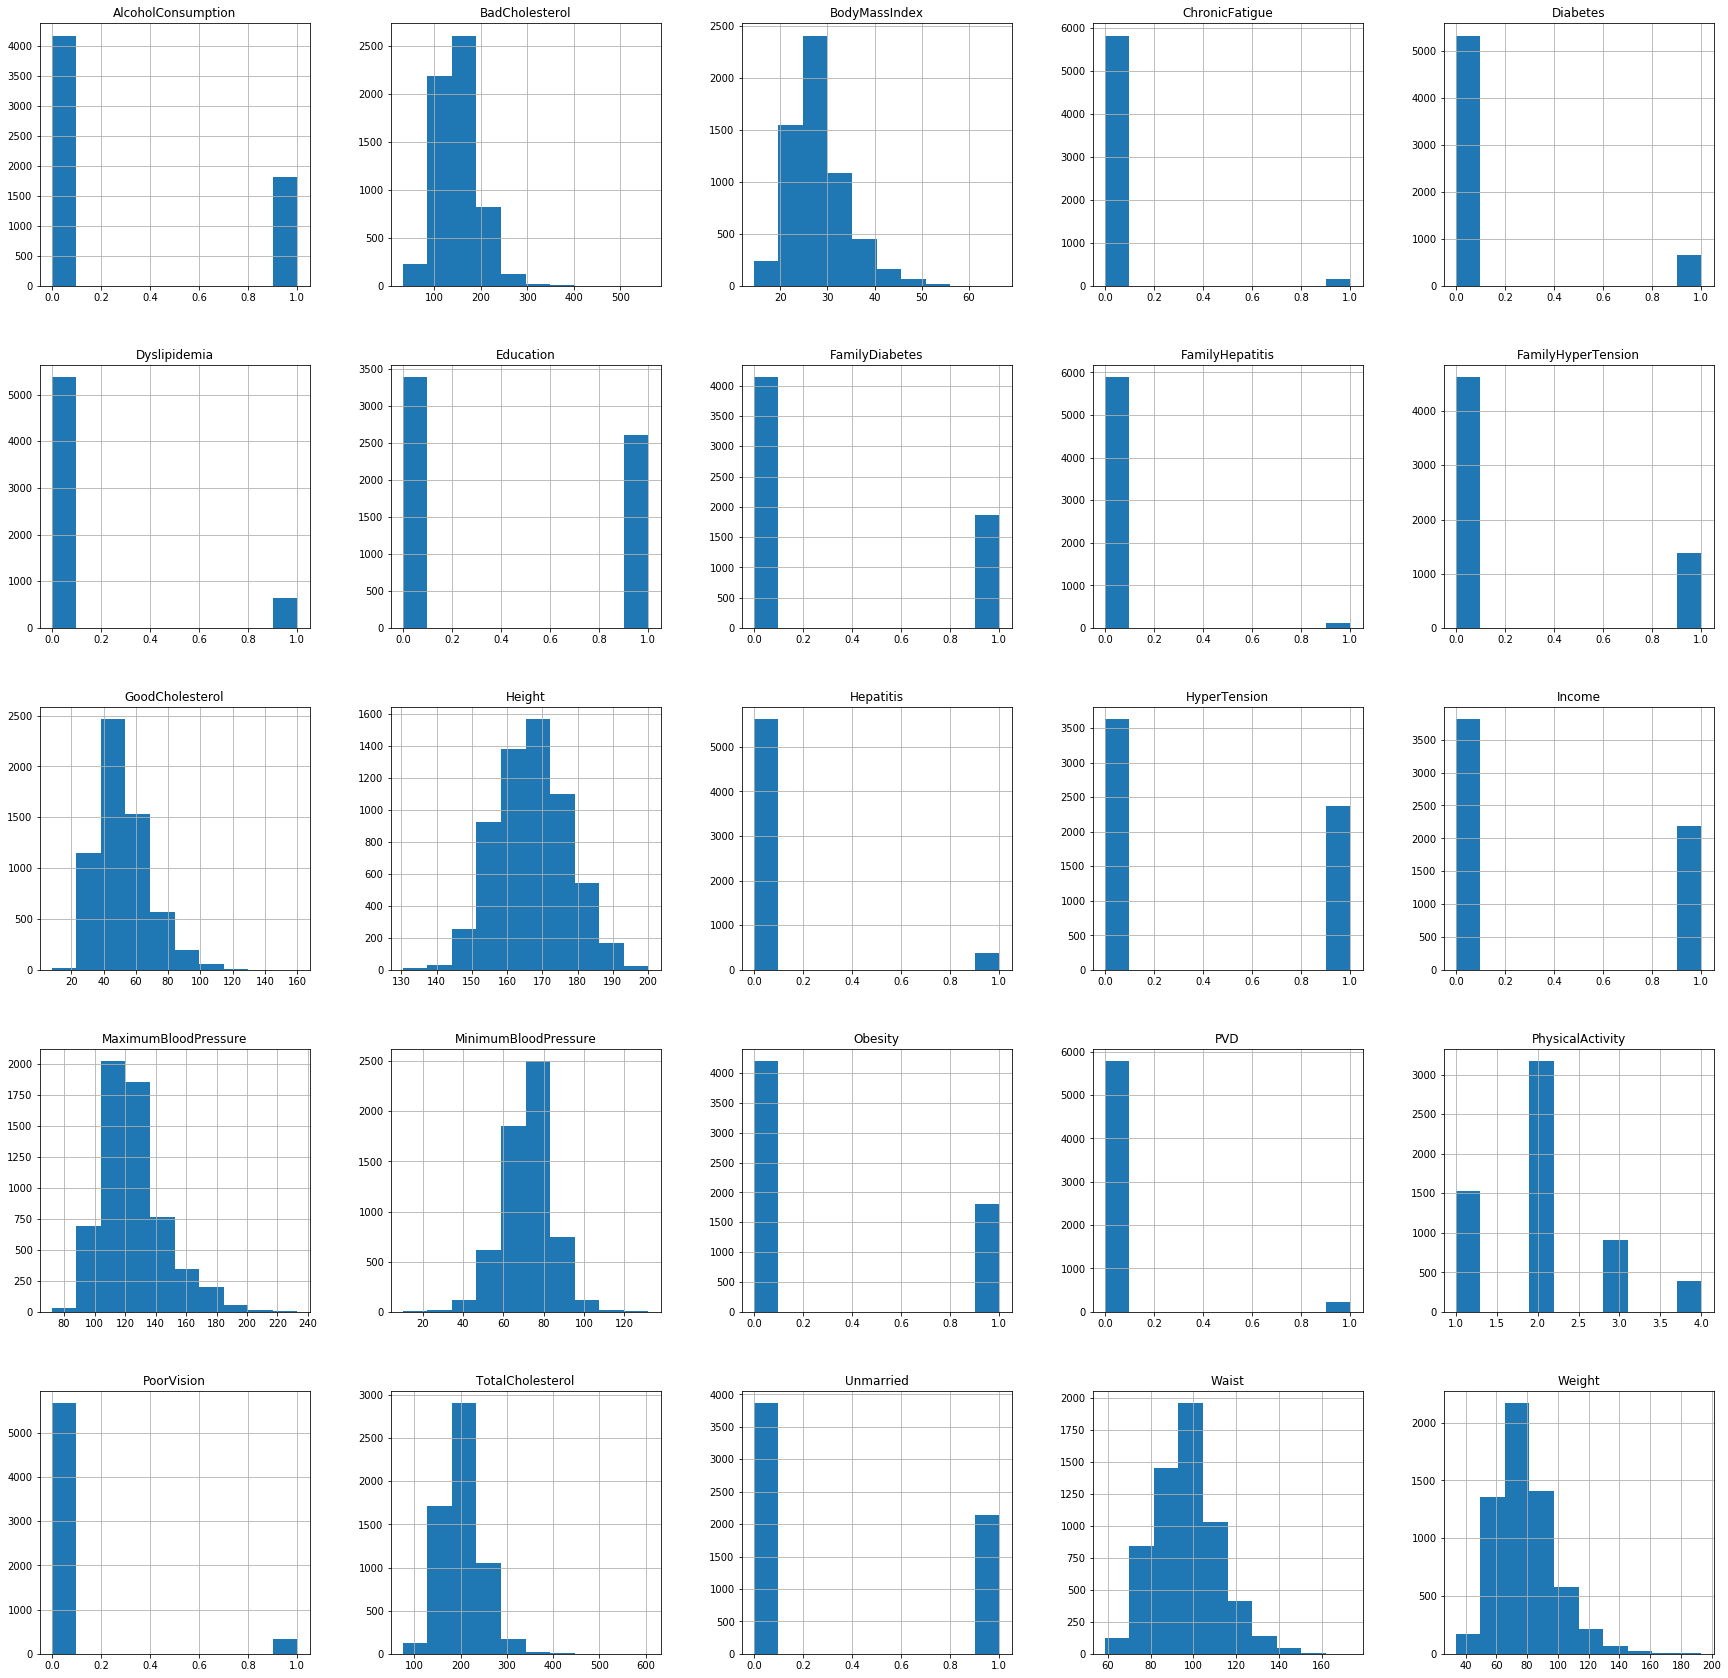

In [255]:
fig1 = df[df.columns[1:78]].hist(figsize =(30,30))
fig1

In [160]:
label = df['ALF']

In [161]:
label = label.values.reshape(-1, 1)

In [162]:
df = df.drop(['ALF','Source of Care'], axis=1)

In [163]:
df.corr()

,Age,Weight,Height,BodyMassIndex,Obesity,Waist,MaximumBloodPressure,MinimumBloodPressure,GoodCholesterol,BadCholesterol,TotalCholesterol,Dyslipidemia,PVD,PhysicalActivity,Education,Unmarried,Income,PoorVision,AlcoholConsumption,HyperTension,FamilyHyperTension,Diabetes,FamilyDiabetes,Hepatitis,FamilyHepatitis,ChronicFatigue
Age,1.000000,-0.050172,-0.144693,0.027283,0.006385,0.172103,0.559924,0.021252,0.040315,0.137215,0.153442,0.023648,0.224636,-0.176430,-0.119532,-0.020996,-0.157903,0.161967,0.204649,0.491920,-0.112487,0.246075,0.106694,0.263613,-0.019770,0.180345
Weight,-0.050172,1.000000,0.462434,0.863367,0.661514,0.876139,0.049158,0.178549,-0.314954,0.134971,0.018215,0.074894,-0.039535,-0.042568,0.044377,-0.084613,0.033977,-0.033335,0.098184,0.114257,0.067024,0.125841,0.090733,0.021580,-0.030085,0.024029
Height,-0.144693,0.462434,1.000000,-0.035309,-0.056179,0.194758,-0.105991,0.161928,-0.198248,-0.032763,-0.106934,0.046492,-0.041663,0.100949,0.171397,-0.083254,0.151873,-0.034163,0.106724,-0.086737,-0.001649,-0.030545,-0.051108,-0.004920,-0.074409,-0.019795
BodyMassIndex,0.027283,0.863367,-0.035309,1.000000,0.780720,0.878641,0.119642,0.112332,-0.244222,0.163155,0.073130,0.053456,-0.023932,-0.103333,-0.046365,-0.047036,-0.047349,-0.015228,0.053527,0.180016,0.079796,0.161604,0.130698,0.032357,0.012864,0.034983
Obesity,0.006385,0.661514,-0.056179,0.780720,1.000000,0.683162,0.082194,0.093112,-0.181913,0.122603,0.055699,0.049277,-0.011788,-0.090709,-0.038512,-0.019721,-0.041570,-0.016443,0.021857,0.152056,0.039404,0.110534,0.100339,0.033517,0.011128,0.020829
Waist,0.172103,0.876139,0.194758,0.878641,0.683162,1.000000,0.180777,0.127650,-0.311044,0.235290,0.121066,0.088227,0.029557,-0.104028,-0.060089,-0.088034,-0.067220,0.016081,0.130448,0.237640,0.040454,0.222138,0.130994,0.080711,-0.001343,0.063089
MaximumBloodPressure,0.559924,0.049158,-0.105991,0.119642,0.082194,0.180777,1.000000,0.345462,0.014680,0.142782,0.149447,0.003650,0.163933,-0.080863,-0.131478,0.060721,-0.132987,0.091087,0.070672,0.623262,-0.001219,0.185553,0.081842,0.139120,-0.008754,0.061006
MinimumBloodPressure,0.021252,0.178549,0.161928,0.112332,0.093112,0.127650,0.345462,1.000000,-0.083515,0.128895,0.098159,0.041815,-0.052034,0.022390,0.026610,-0.055855,0.033222,-0.031005,0.001407,0.234699,0.071922,-0.038696,0.044908,-0.046835,-0.073766,-0.044538
GoodCholesterol,0.040315,-0.314954,-0.198248,-0.244222,-0.181913,-0.311044,0.014680,-0.083515,1.000000,-0.205911,0.166838,-0.223128,-0.009408,-0.012386,0.079359,0.061111,0.057397,-0.024536,-0.014408,-0.005778,-0.001422,-0.115192,-0.050279,-0.068848,0.027587,-0.041450
BadCholesterol,0.137215,0.134971,-0.032763,0.163155,0.122603,0.235290,0.142782,0.128895,-0.205911,1.000000,0.930502,0.329475,0.025287,0.005572,-0.056707,-0.067831,-0.013531,-0.007029,0.035969,0.093931,0.015896,0.062966,0.057162,0.004463,-0.055626,-0.015985


In [164]:
from sklearn.preprocessing import Imputer


imputer = Imputer(missing_values = 'NaN',strategy = 'median',axis=0)
imputer = imputer.fit(df.iloc[:,3:13]) 
df.iloc[:,3:13] = imputer.transform(df.iloc[:,3:13])

C:\Users\harme\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 28 columns):
Age                     6000 non-null int64
Gender                  6000 non-null object
Region                  6000 non-null object
Weight                  6000 non-null float64
Height                  6000 non-null float64
BodyMassIndex           6000 non-null float64
Obesity                 6000 non-null float64
Waist                   6000 non-null float64
MaximumBloodPressure    6000 non-null float64
MinimumBloodPressure    6000 non-null float64
GoodCholesterol         6000 non-null float64
BadCholesterol          6000 non-null float64
TotalCholesterol        6000 non-null float64
Dyslipidemia            6000 non-null int64
PVD                     6000 non-null int64
PhysicalActivity        5992 non-null float64
Education               5985 non-null float64
Unmarried               5699 non-null float64
Income                  5208 non-null float64
PoorVision              562

In [166]:
# Checking the unique values of each feature with null values
print(df['PhysicalActivity'].unique())
print(df['Education'].unique())
print(df['Unmarried'].unique())
print(df['Income'].unique())
print(df['PoorVision'].unique())
print(df['AlcoholConsumption'].unique())
print(df['HyperTension'].unique())
print(df['FamilyHyperTension'].unique())
print(df['Diabetes'].unique())
print(df['FamilyDiabetes'].unique())
print(df['Hepatitis'].unique())
print(df['FamilyHepatitis'].unique())
print(df['ChronicFatigue'].unique())

[ 3.  1.  2.  4. nan]
[ 0.  1. nan]
[ 0. nan  1.]
[ 1.  0. nan]
[ 0. nan  1.]
[1 0]
[ 0.  1. nan]
[0 1]
[ 0.  1. nan]
[1 0]
[ 1.  0. nan]
[ 0.  1. nan]
[ 0. nan  1.]


In [167]:
# Impute te null feilds with median values
df['PhysicalActivity'].fillna(df['PhysicalActivity'].median(), inplace = True)
df['Education'].fillna(df['Education'].median(), inplace = True)
df['Unmarried'].fillna(df['Unmarried'].median(), inplace = True)
df['Income'].fillna(df['Income'].median(), inplace = True)
df['PoorVision'].fillna(df['PoorVision'].median(), inplace = True)

df['HyperTension'].fillna(df['HyperTension'].median(), inplace = True)

df['Diabetes'].fillna(df['Diabetes'].median(), inplace = True)
df['Hepatitis'].fillna(df['Hepatitis'].median(), inplace = True)
df['FamilyHepatitis'].fillna(df['FamilyHepatitis'].median(), inplace = True)
df['ChronicFatigue'].fillna(df['ChronicFatigue'].median(), inplace = True)
df['PoorVision'].fillna(df['PoorVision'].median(), inplace = True)
df['PoorVision'].fillna(df['PoorVision'].median(), inplace = True)
print(df.isnull().sum())

Age                     0
Gender                  0
Region                  0
Weight                  0
Height                  0
BodyMassIndex           0
Obesity                 0
Waist                   0
MaximumBloodPressure    0
MinimumBloodPressure    0
GoodCholesterol         0
BadCholesterol          0
TotalCholesterol        0
Dyslipidemia            0
PVD                     0
PhysicalActivity        0
Education               0
Unmarried               0
Income                  0
PoorVision              0
AlcoholConsumption      0
HyperTension            0
FamilyHyperTension      0
Diabetes                0
FamilyDiabetes          0
Hepatitis               0
FamilyHepatitis         0
ChronicFatigue          0
dtype: int64


In [168]:
# Convert the data type for model implementation
df['Age'] = df.Age.astype(float)
df['Dyslipidemia'] = df.Dyslipidemia.astype(float)
df['PVD'] = df.PVD.astype(float)
df['AlcoholConsumption'] = df.AlcoholConsumption.astype(float)
df['FamilyHyperTension'] = df.FamilyHyperTension.astype(float)
df['FamilyDiabetes'] = df.FamilyDiabetes.astype(float)
df_DT = df.drop(['Gender','Region'], axis=1)

In [169]:
X_train, X_test1, y_train, y_test1 = train_test_split(df_DT, label,test_size=0.3,shuffle=True, random_state=10)

In [170]:
X_test, X_val, y_test, y_val = train_test_split(X_test1, y_test1,test_size=0.33,shuffle=True, random_state=10)

In [183]:
y_train = y_train.ravel()
y_test = y_test.ravel()
y_val = y_val.ravel()

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [172]:
clf = DecisionTreeClassifier(random_state=10)
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf, X_train,y_train, cv=25)
score.mean()

0.8842934924740544

In [173]:
DT = clf.fit(X_train,y_train)
pred = clf.predict(X_val)

In [174]:
count = 0
for i in range( len(y_val) ):
    if pred[i] != y_val[i]: 
        count = count + 1
error = count/len(pred)
print( "Error for Decision Tree = %f " % (error*100) + '%' )
accuracy = (1-error)
print( "Accuracy for Decision Tree = %f " % (accuracy*100) + '%' )

Error for Decision Tree = 11.111111 %
Accuracy for Decision Tree = 88.888889 %


In [175]:
pred1 = clf.predict(X_test)
count = 0
for i in range( len(y_test) ):
    if pred1[i] != y_test[i]: 
        count = count + 1
error = count/len(pred1)
print( "Error for Decision Tree (Test set) = %f " % (error*100) + '%' )
accuracy = (1-error)
print( "Accuracy for Decision Tree (Test set) = %f " % (accuracy*100) + '%' )

Error for Decision Tree (Test set) = 11.194030 %
Accuracy for Decision Tree (Test set) = 88.805970 %


In [281]:
TN, FP, FN, TP  = confusion_matrix(y_test, pred1).ravel()
RecallDT = TP / (TP + FN)
PrecisionDT = TP / (TP + FP)
print('Recall for DT is: ', RecallDT )
print('Precision for DT is: ', PrecisionDT )

Recall for DT is:  0.43434343434343436
Precision for DT is:  0.3524590163934426


In [184]:
# Now lets check the scores of train set and accuracy for Random Forest Classifier on the test and validation data.
rfc = RandomForestClassifier(n_estimators=100, random_state=10)
score1 = cross_val_score(rfc, X_train,y_train, cv=25)
score1.mean()

0.9252377071722997

We can clearly see that random forest has a better estimation for the score on the training set, lets see how accurate it is
on the Validation and Test sets. I will be using 100 trees  to determine the best performance classifier. 

In [185]:
RandomForest = rfc.fit(X_train,y_train)
pred2 = rfc.predict(X_val)

In [186]:
count = 0
for i in range( len(y_val) ):
    if pred2[i] != y_val[i]: 
        count = count + 1
error = count/len(pred2)
print( "Error for Random Forest Classifier = %f " % (error*100) + '%' )
accuracy = (1-error)
print( "Accuracy Random Forest Classifier = %f " % (accuracy*100) + '%' )

Error for Random Forest Classifier = 7.407407 %
Accuracy Random Forest Classifier = 92.592593 %


In [187]:
pred3 = rfc.predict(X_test)
count = 0
for i in range( len(y_test) ):
    if pred3[i] != y_test[i]: 
        count = count + 1
error = count/len(pred3)
print( "Error for Random Forest Classifier (Test set) = %f " % (error*100) + '%' )
accuracy = (1-error)
print( "Accuracy Random Forest Classifier (Test set) = %f " % (accuracy*100) + '%' )

Error for Random Forest Classifier (Test set) = 7.462687 %
Accuracy Random Forest Classifier (Test set) = 92.537313 %


In [181]:
from sklearn.metrics import confusion_matrix

In [191]:
# confusion matrix to check recall for Random Forest on the test set
TN, FP, FN, TP  = confusion_matrix(y_test, pred3).ravel()
RecallRF = TP / (TP + FN)
PrecisionRF = TP / (TP + FP)
print('Recall for Random Forest is: ', RecallRF )
print('Precision for Random Forest is: ', PrecisionRF )

Recall for Random Forest is:  0.13131313131313133
Precision for Random Forest is:  0.7647058823529411


Lets try Naive Bayes for the same


In [199]:
X_train = sc.fit_transform(X_train.values)
X_test = sc.fit_transform(X_test.values)
X_val = sc.fit_transform(X_val.values)

In [207]:
from sklearn.naive_bayes import GaussianNB
gasnb=GaussianNB()
gasnb.fit(X_train, y_train)
predGNB=gasnb.predict(X_val)
scoreGNB=gasnb.score(X_val, y_val)
print('Accuracy for Naive Bayes on the Validation Set is: ', scoreGNB,'%')

Accuracy for Naive Bayes on the Test Set is:  0.8535353535353535 %


In [209]:
predGNBT=gasnb.predict(X_test)
scoreGNBT=gasnb.score(X_test, y_test)
print('Accuracy for Naive Bayes on the Test Set is: ', scoreGNBT,'%')

Accuracy for Naive Bayes on the Test Set is:  0.8524046434494196 %


In [214]:
TN, FP, FN, TP  = confusion_matrix(y_test, predGNBT).ravel()
RecallNB = TP / (TP + FN)
PrecisionNB = TP / (TP + FP)
print('Recall for Naive Bayes is: ', RecallNB )
print('Precision for Naive Bayes is: ', PrecisionNB )

Recall for Naive Bayes is:  0.5959595959595959
Precision for Naive Bayes is:  0.29949238578680204


KNN

In [210]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()

In [211]:
KNN.fit(X_train, y_train)
predictKNN=KNN.predict(X_val)
scoreKNN=KNN.score(X_val, y_val)
print('Accuracy for KNN classifier on validation set is',scoreKNN,'%')

Accuracy for KNN classifier is 0.9175084175084175 %


In [212]:
predictKNNT=KNN.predict(X_test)
scoreKNNT=KNN.score(X_test, y_test)
print('Accuracy for KNN classifier for the test set is',scoreKNNT,'%')

Accuracy for KNN classifier for the test set is 0.9129353233830846 %


In [213]:
TN, FP, FN, TP  = confusion_matrix(y_test, predictKNNT).ravel()
RecallKNN = TP / (TP + FN)
PrecisionKNN = TP / (TP + FP)
print('Recall for KNN is: ', RecallKNN )
print('Precision for KNN is: ', PrecisionKNN )

Recall for KNN is:  0.12121212121212122
Precision for KNN is:  0.4


SVM

In [227]:
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier()

In [230]:
svm.fit(X_train, y_train)
predictSVM=svm.predict(X_val)
scoreSVM=svm.score(X_val, y_val)
print('Accuracy for SVM classifier on validation set is',scoreSVM,'%')

Accuracy for SVM classifier is 0.9208754208754208 %


In [231]:
predictSVMT=svm.predict(X_test)
scoreSVMT=svm.score(X_test, y_test)
print('Accuracy for SVM classifier for the test set is',scoreSVMT,'%')

Accuracy for SVM classifier for the test set is 0.9145936981757877 %


In [232]:
TN, FP, FN, TP  = confusion_matrix(y_test, predictSVMT).ravel()
RecallSVM = TP / (TP + FN)
PrecisionSVM = TP / (TP + FP)
print('Recall for SVM is: ', RecallSVM )
print('Precision for SVM is: ', PrecisionSVM )

Recall for SVM is:  0.21212121212121213
Precision for SVM is:  0.45652173913043476


Trying kernel trick incase we can observe an increase in the recall

In [251]:
from sklearn.svm import SVC
svc = SVC(kernel='poly')

In [252]:
svc.fit(X_train, y_train)
predictSVC=svc.predict(X_val)
scoreSVC=svc.score(X_val, y_val)
print('Accuracy for SVC classifier on validation set is',scoreSVC,'%')
predictSVCT=svc.predict(X_test)
scoreSVCT=svc.score(X_test, y_test)
print('Accuracy for SVC classifier for the test set is',scoreSVCT,'%')

Accuracy for SVC classifier is 0.9292929292929293 %
Accuracy for SVC classifier for the test set is 0.927860696517413 %


In [253]:
TN, FP, FN, TP  = confusion_matrix(y_test, predictSVCT).ravel()
RecallSVC = TP / (TP + FN)
PrecisionSVC = TP / (TP + FP)
print('Recall for SVC is: ', RecallSVC )
print('Precision for SVC is: ', PrecisionSVC )

Recall for SVC is:  0.23232323232323232
Precision for SVC is:  0.6764705882352942


Now finally want to check Logistic regression

In [278]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='newton-cg')

In [279]:
lg.fit(X_train, y_train)
predictlg=lg.predict(X_val)
scorelg=lg.score(X_val, y_val)
print('Accuracy for Logistic Regression classifier on validation set is',scorelg,'%')
predictlgT=lg.predict(X_test)
scorelgT=lg.score(X_test, y_test)
print('Accuracy for Logistic Regression classifier for the test set is',scorelgT,'%')

Accuracy for Logistic Regression classifier is 0.9276094276094277 %
Accuracy for Logistic Regression classifier for the test set is 0.9237147595356551 %


In [280]:
TN, FP, FN, TP  = confusion_matrix(y_test, predictlgT).ravel()
Recalllg = TP / (TP + FN)
Precisionlg = TP / (TP + FP)
print('Recall for Logistic Regression is: ', Recalllg )
print('Precision for Logistic Regression is: ', Precisionlg )

Recall for Logistic Regression is:  0.1414141414141414
Precision for Logistic Regression is:  0.6666666666666666


Models used: 
    Decision trees
    Random Forest
    Naive Bayes
    K-Nearest Neighbors
    Support Vector Machine (linear)
    Support Vector Machine (Kernel trick)
    Logistic Regression